Here we train and test an autoencoder on digits data from scikit-learn. We first import the necessary packages and digit data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn import io, nn, preprocess
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

Here we add commands to autoreload the imported packages, including changes to nn.

In [2]:
%load_ext autoreload
%autoreload 2

Here we load the digits data.

In [3]:
digits = load_digits()
print("digit data: ", digits['data'])

digit data:  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


We can then do a train/test split of the digits data 0.8/0.2.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'], test_size=0.2, random_state=0)
print("train shape: ", X_train.shape)
print("test shape: ", X_test.shape)
print("ytrain shape: ", y_train.shape)
print("ytest shape: ", y_test.shape)

train shape:  (1437, 64)
test shape:  (360, 64)
ytrain shape:  (1437,)
ytest shape:  (360,)


Now we can train a 64x16x64 instance of our autoencoder with a grid search of hyperparameters. We vary the learning rate, batch size, and epoch count for training. We use MSE instead of BCE as the data is not non-binary. We also used the sigmoid activation function, as this performed better than the relu function.

In [6]:
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}]
lrs = np.logspace(-1.0, -4.0, num=4)
seed = 42
batch_sizes = np.array([10, 50, 100, 250])
epochss = np.linspace(50, 250, 5, dtype=int)
loss_function = 'mse'
hyperparams = {}

for lr in lrs:
    for batch_size in batch_sizes:
        for epochs in epochss:
            print("training with the following hyperparameters: ", "lr=" + str(lr) + " " + "batch=" + str(batch_size) + " " + "epochs=" + str(epochs))
            autoencoder = nn.NeuralNetwork(nn_arch=nn_arch, lr=lr, seed=seed, batch_size=batch_size, epochs=epochs, loss_function=loss_function)
            _, loss_test = autoencoder.fit(X_train, y_train, X_test, y_test)
            hyperparams[('lr=' + str(lr), 'batch size=' + str(batch_size), 'epochs=' + str(epochs))] = loss_test[-1]

print("optimal hyperparameters for training are: ", min(hyperparams, key=hyperparams.get))


training with the following hyperparameters:  lr=0.1 batch=10 epochs=50
training with the following hyperparameters:  lr=0.1 batch=10 epochs=100
training with the following hyperparameters:  lr=0.1 batch=10 epochs=150
training with the following hyperparameters:  lr=0.1 batch=10 epochs=200
training with the following hyperparameters:  lr=0.1 batch=10 epochs=250
training with the following hyperparameters:  lr=0.1 batch=50 epochs=50
training with the following hyperparameters:  lr=0.1 batch=50 epochs=100
training with the following hyperparameters:  lr=0.1 batch=50 epochs=150
training with the following hyperparameters:  lr=0.1 batch=50 epochs=200
training with the following hyperparameters:  lr=0.1 batch=50 epochs=250
training with the following hyperparameters:  lr=0.1 batch=100 epochs=50
training with the following hyperparameters:  lr=0.1 batch=100 epochs=100
training with the following hyperparameters:  lr=0.1 batch=100 epochs=150
training with the following hyperparameters:  lr=0.

We find that the optimal hyperparameters for training are: lr=0.1, batch size=250, and epoch count=50. We can now train an instance of our autoencoder with these hyperparameters.

In [25]:
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}]
autoencoder = nn.NeuralNetwork(nn_arch=nn_arch, lr=0.1, seed=42, batch_size=250, epochs=50, loss_function='mse')
train_test, loss_test = autoencoder.fit(X_train, y_train, X_test, y_test)

Now we can plot the training and test loss from our trained autoencoder. We find that the training loss reaches a steady-state after <5 epochs, and the validation loss remains steady for all 50 epochs. For other sets of hyperparameters, the minimum training error over n epochs was found to be lower than for this set of hyperparameters, but overfitting led to poor accuracy on the validation set. In this

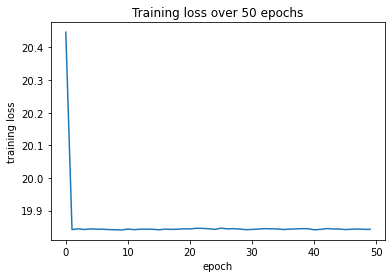

In [31]:
plt.figure()
plt.plot(train_test)
plt.title('Training loss over 50 epochs')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.show()

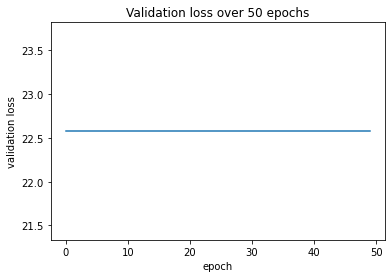

In [32]:
plt.figure()
plt.plot(loss_test)
plt.title('Validation loss over 50 epochs')
plt.xlabel('epoch')
plt.ylabel('validation loss')
plt.show()

In [35]:
pred = autoencoder.predict(X_test)
reconstruction_error = autoencoder._mean_squared_error(pred, X_test)
print("average reconstruction error on validation set: ", reconstruction_error)

average reconstruction error on validation set:  50.935894097222224
